# Завдання

- Збудувати графік лос функціїї для тренінгових і тестових даних
- Порівняти ваги моделі з оригінальними
- Збудувати графік результатів


Маємо наступний код

Epoch: 0 | MAE Train Loss: 12.06096903681876 | MAE Test Loss: 18.2755853544582 
Epoch: 10 | MAE Train Loss: 1.6753880955750298 | MAE Test Loss: 2.2075226664091603 
Epoch: 20 | MAE Train Loss: 1.5378294992329689 | MAE Test Loss: 2.0257333518880793 
Epoch: 30 | MAE Train Loss: 1.4087694919482892 | MAE Test Loss: 2.0117039584752283 
Epoch: 40 | MAE Train Loss: 1.2862078557195629 | MAE Test Loss: 2.0451970701867888 
Epoch: 50 | MAE Train Loss: 1.1885630462905539 | MAE Test Loss: 1.9668437766306326 
Epoch: 60 | MAE Train Loss: 1.111641662084411 | MAE Test Loss: 1.6888025681177776 
Epoch: 70 | MAE Train Loss: 1.0506075124310388 | MAE Test Loss: 1.5318420896626481 
Epoch: 80 | MAE Train Loss: 1.0099555427499611 | MAE Test Loss: 1.4670874378897927 
Epoch: 90 | MAE Train Loss: 0.9712325597575452 | MAE Test Loss: 1.3307637012366091 


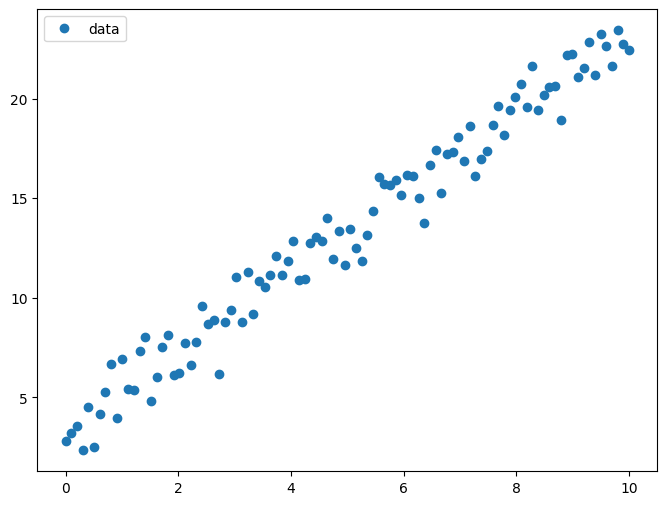

In [8]:
from typing import Tuple
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(1337)
torch.manual_seed(314)


def get_data(nsamples: int = 100) -> Tuple[np.array, np.array]:
    x = np.linspace(0, 10, nsamples)
    y = 2 * x + 3.5
    return (x, y)


def add_noise(y: np.array) -> np.array:
    noise = np.random.normal(size=y.size)
    return y + noise


# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__() 
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)
    

if __name__ == "__main__":
    # Get available device
    # device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    # print(f"Using {device = }")

    # Check PyTorch version
    # print(f"Using {torch.__version__ = }")

    # Getting data
    x, y_true = get_data()
    y = add_noise(y_true)

    x, y_true, y = torch.tensor(x), torch.tensor(y_true), torch.tensor(y)

    # Plot and investigate data
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(x, y, "o", label="data")
    ax.legend(loc="best")
    plt.savefig("data.png")


    # Create train/test split
    # 80% of data used for training set, 20% for testing 
    train_split = int(0.8 * len(x)) 
    X_train, y_train = x[:train_split], y[:train_split]
    X_test, y_test = x[train_split:], y[train_split:]

    # print(len(X_train), len(y_train), len(X_test), len(y_test))


    # Create an instance of the model (this is a subclass of 
    # nn.Module that contains nn.Parameter(s))
    model_0 = LinearRegressionModel()

    # Check the nn.Parameter(s) within the nn.Module 
    # subclass we created
    # print(f"{list(model_0.parameters()) = }")
    # List named parameters 
    # print(f"{model_0.state_dict() = }")


    # Create the loss function
    loss_fn = nn.L1Loss() # L1Loss loss is same as MAE

    # Create the optimizer
    # ``parameters`` of target model to optimize
    # ``learning rate`` (how much the optimizer should change parameters 
    # at each step, higher=more (less stable), lower=less (might take a long time))
    optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

    # Set the number of epochs (how many times 
    # the model will pass over the training data)
    epochs = 100

    for epoch in range(epochs):
        ### Training

        # Put model in training mode (this is the default state of a model)
        model_0.train()

        # 1. Forward pass on train data using the forward() method inside 
        y_pred = model_0(X_train)

        # 2. Calculate the loss (how different are our models predictions 
        # to the ground truth)
        loss = loss_fn(y_pred, y_train)

        # 3. Zero grad of the optimizer
        optimizer.zero_grad()

        # 4. Loss backwards
        loss.backward()

        # 5. Progress the optimizer
        optimizer.step()

        ### Testing

        # Put the model in evaluation mode
        model_0.eval()

        with torch.inference_mode():
            # 1. Forward pass on test data
            test_pred = model_0(X_test)

            # 2. Caculate loss on test data
            test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

            # Print out what's happening
            if epoch % 10 == 0:
                print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")


# Задвання перше

Спочатку змінемо початковий код


Initial Weights = 0.040108129382133484 and the Last Weights = 2.223439931869507




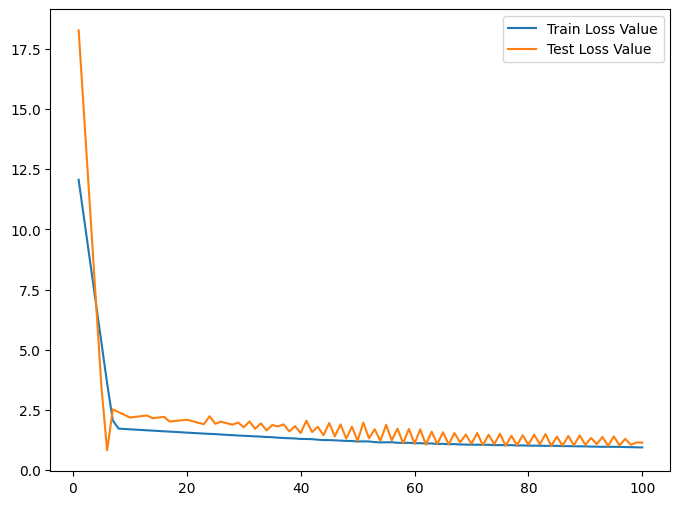

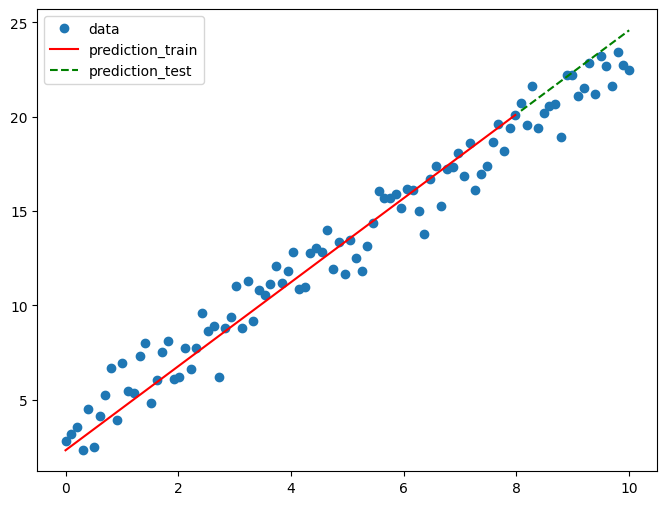

In [9]:
if __name__ == "__main__":
    np.random.seed(1337)
    torch.manual_seed(314)
    x, y_true = get_data()
    y = add_noise(y_true)

    x, y_true, y = torch.tensor(x), torch.tensor(y_true), torch.tensor(y)

    train_split = int(0.8 * len(x)) 
    X_train, y_train = x[:train_split], y[:train_split]
    X_test, y_test = x[train_split:], y[train_split:]


    model_0 = LinearRegressionModel()
    initial_w = model_0.state_dict()['weights'].item()
    last_w = 0
    loss_fn = nn.L1Loss() 

    optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

    epochs = 100

    epoch_count = [i for i in range(1, epochs+1)]
    train_loss_v = []
    test_loss_v = []
    
    for epoch in range(1, epochs+1):
        
        model_0.train()
 
        y_pred = model_0(X_train)

        loss = loss_fn(y_pred, y_train)
        train_loss_v.append(loss.item())
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        model_0.eval()

        with torch.inference_mode():
            
            test_pred = model_0(X_test)
            test_loss = loss_fn(test_pred, y_test.type(torch.float))
            test_loss_v.append(test_loss.item())
        if epoch == 100:
            last_w = model_0.state_dict()['weights'].item()
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(epoch_count, train_loss_v, label='Train Loss Value')
    ax.plot(epoch_count, test_loss_v, label='Test Loss Value')
    ax.legend()
    plt.savefig("train_test_loss.png")
    
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(x, y, "o", label="data")
    ax.plot(X_train, y_pred.cpu().detach().numpy(), "r-", label="prediction_train")
    ax.plot(X_test, test_pred.cpu().detach().numpy(), "g--", label="prediction_test")
    ax.legend(loc="best")
    tp.savefig("prediction.png")
    
    print(f"\nInitial Weights = {initial_w} and the Last Weights = {last_w}\n\n")

За графіком можемо побачити, що Test Loss Value постійно наближаються та віддаляються від мінімума по ходу епох.

Наші кінцеві weights перетворились на значно зросли порівняно з початковими.

Дані на яких тренувалась модель в свою чергу більш плавні.

Однак, це скоріш зобумовлено погано розділеними даними для тестування та тренування.

Також можемо бачити, що модель натренувалась якісно. 

Лінія, яка показує наші predictions (для тестових даних) як раз йде по центру наших даних. 

Лінія, яка показує наші predictions для даних, які модель не бачила, дає менш точні дані. 

Проте вона все ще в межах наших даних і враховуючи неідеальність початкових даних для тренування, модель доволі якісна.

In [18]:
class LinearRegressionModel(nn.Module): 
    def __init__(self):
        super().__init__() 
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=False) 

        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=False) 

    def forward(self, x: torch.Tensor) -> torch.Tensor: 
        return self.weights * x + self.bias 
        
if __name__ == "__main__":
    np.random.seed(1337)
    torch.manual_seed(314)
    x, y_true = get_data()
    y = add_noise(y_true)

    x, y_true, y = torch.tensor(x), torch.tensor(y_true), torch.tensor(y)

    train_split = int(0.8 * len(x)) 
    X_train, y_train = x[:train_split], y[:train_split]
    X_test, y_test = x[train_split:], y[train_split:]


    model_0 = LinearRegressionModel()
    # initial_w = model_0.state_dict()['weights'].item()
    last_w = 0
    loss_fn = nn.L1Loss() 

    optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

    epochs = 100

    epoch_count = [i for i in range(1, epochs+1)]
    train_loss_v = []
    test_loss_v = []
    
    for epoch in range(epochs):
        
        model_0.train()
 
        y_pred = model_0(X_train)

        loss = loss_fn(y_pred, y_train)
        train_loss_v.append(loss.item())
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        model_0.eval()

        with torch.inference_mode():
            
            test_pred = model_0(X_test)
            test_loss = loss_fn(test_pred, y_test.type(torch.float))
            test_loss_v.append(test_loss.item())
        # if epoch == 100:
        #     last_w = model_0.state_dict()['weights'].item()
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(epoch_count, train_loss_v, label='Train Loss Value')
    ax.plot(epoch_count, test_loss_v, label='Test Loss Value')
    ax.legend()
    # plt.savefig("train_test_loss.png")
    
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(x, y, "o", label="data")
    ax.plot(X_train, y_pred.cpu().detach().numpy(), "r-", label="prediction_train")
    ax.plot(X_test, test_pred.cpu().detach().numpy(), "g--", label="prediction_test")
    ax.legend(loc="best")
    # tp.savefig("prediction.png")

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

Змінивши weights та/або bias до grad=False, ми отримуємо помилку. 

В наступному експеременті приберем loss.backward(), який викликає помилку

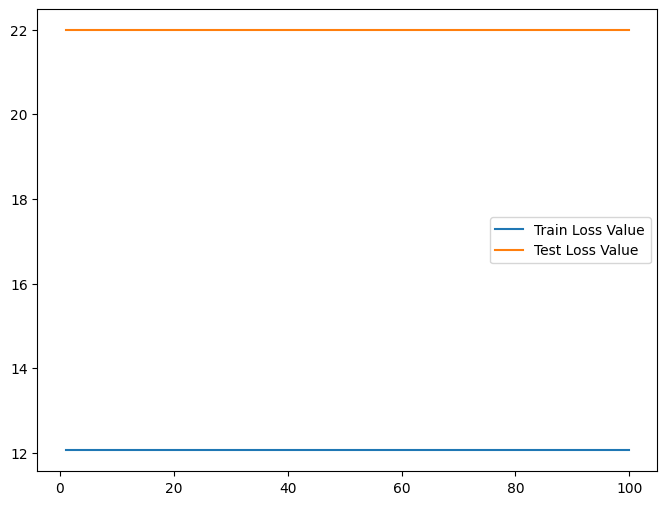

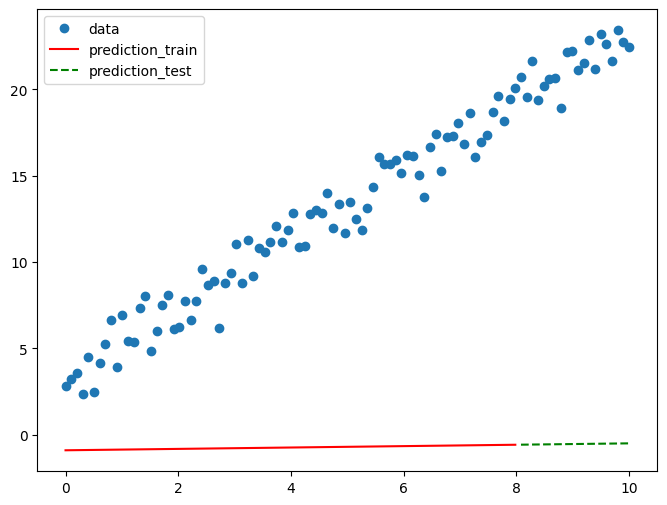

In [20]:
class LinearRegressionModel(nn.Module): 
    def __init__(self):
        super().__init__() 
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=False) 

        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=False) 

    def forward(self, x: torch.Tensor) -> torch.Tensor: 
        return self.weights * x + self.bias 
        
if __name__ == "__main__":
    np.random.seed(1337)
    torch.manual_seed(314)
    x, y_true = get_data()
    y = add_noise(y_true)

    x, y_true, y = torch.tensor(x), torch.tensor(y_true), torch.tensor(y)

    train_split = int(0.8 * len(x)) 
    X_train, y_train = x[:train_split], y[:train_split]
    X_test, y_test = x[train_split:], y[train_split:]


    model_0 = LinearRegressionModel()
    # initial_w = model_0.state_dict()['weights'].item()
    last_w = 0
    loss_fn = nn.L1Loss() 

    optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

    epochs = 100

    epoch_count = [i for i in range(1, epochs+1)]
    train_loss_v = []
    test_loss_v = []
    
    for epoch in range(epochs):
        
        model_0.train()
 
        y_pred = model_0(X_train)

        loss = loss_fn(y_pred, y_train)
        train_loss_v.append(loss.item())
        
        optimizer.zero_grad()
        # loss.backward()
        optimizer.step()

        model_0.eval()

        with torch.inference_mode():
            
            test_pred = model_0(X_test)
            test_loss = loss_fn(test_pred, y_test.type(torch.float))
            test_loss_v.append(test_loss.item())
        # if epoch == 100:
        #     last_w = model_0.state_dict()['weights'].item()
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(epoch_count, train_loss_v, label='Train Loss Value')
    ax.plot(epoch_count, test_loss_v, label='Test Loss Value')
    ax.legend()
    # plt.savefig("train_test_loss.png")
    
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(x, y, "o", label="data")
    ax.plot(X_train, y_pred.cpu().detach().numpy(), "r-", label="prediction_train")
    ax.plot(X_test, test_pred.cpu().detach().numpy(), "g--", label="prediction_test")
    ax.legend(loc="best")
    # tp.savefig("prediction.png")

В цьому випадку бачимо, що модель не тренується.

Кінцева точність моделі 0.

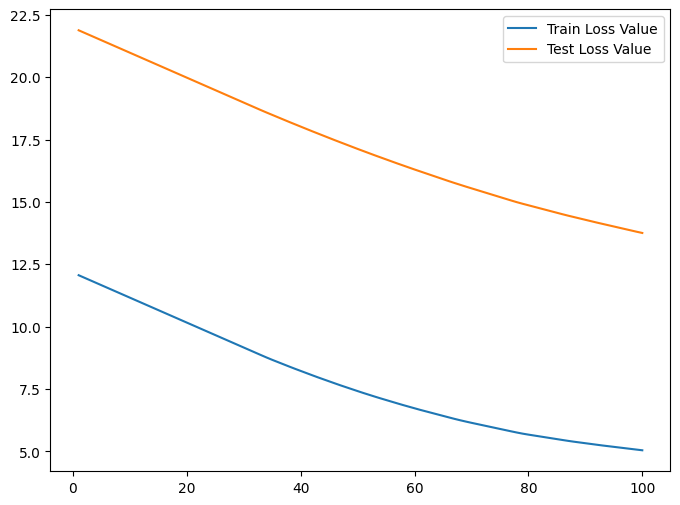

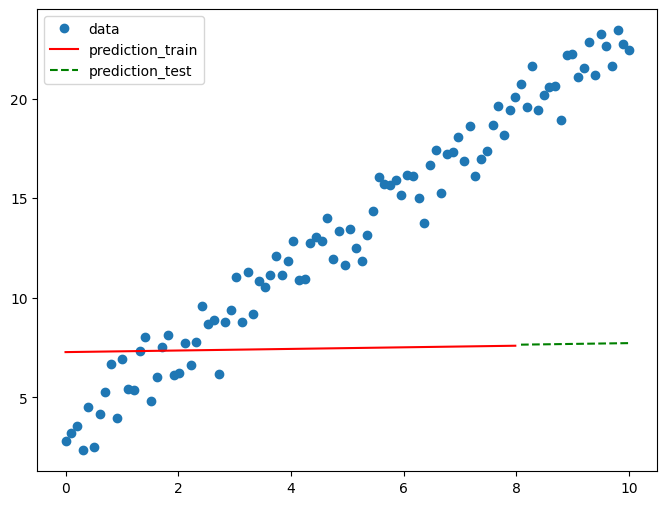

In [21]:
class LinearRegressionModel(nn.Module): 
    def __init__(self):
        super().__init__() 
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=False) 

        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True) 

    def forward(self, x: torch.Tensor) -> torch.Tensor: 
        return self.weights * x + self.bias 
        
if __name__ == "__main__":
    np.random.seed(1337)
    torch.manual_seed(314)
    x, y_true = get_data()
    y = add_noise(y_true)

    x, y_true, y = torch.tensor(x), torch.tensor(y_true), torch.tensor(y)

    train_split = int(0.8 * len(x)) 
    X_train, y_train = x[:train_split], y[:train_split]
    X_test, y_test = x[train_split:], y[train_split:]


    model_0 = LinearRegressionModel()
    # initial_w = model_0.state_dict()['weights'].item()
    last_w = 0
    loss_fn = nn.L1Loss() 

    optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

    epochs = 100

    epoch_count = [i for i in range(1, epochs+1)]
    train_loss_v = []
    test_loss_v = []
    
    for epoch in range(epochs):
        
        model_0.train()
 
        y_pred = model_0(X_train)

        loss = loss_fn(y_pred, y_train)
        train_loss_v.append(loss.item())
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        model_0.eval()

        with torch.inference_mode():
            
            test_pred = model_0(X_test)
            test_loss = loss_fn(test_pred, y_test.type(torch.float))
            test_loss_v.append(test_loss.item())
        # if epoch == 100:
        #     last_w = model_0.state_dict()['weights'].item()
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(epoch_count, train_loss_v, label='Train Loss Value')
    ax.plot(epoch_count, test_loss_v, label='Test Loss Value')
    ax.legend()
    # plt.savefig("train_test_loss.png")
    
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(x, y, "o", label="data")
    ax.plot(X_train, y_pred.cpu().detach().numpy(), "r-", label="prediction_train")
    ax.plot(X_test, test_pred.cpu().detach().numpy(), "g--", label="prediction_test")
    ax.legend(loc="best")
    # tp.savefig("prediction.png")

Бачимо, що коли weights не потребують grad, ситуація покращується, модель десь на рівні з деякими даними.

Проте все ще її точність настільки незначна, що модель все ще не працює так як треба.

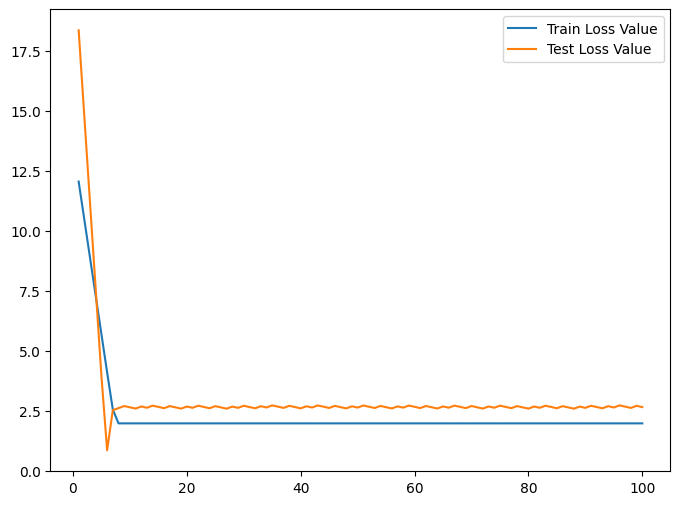

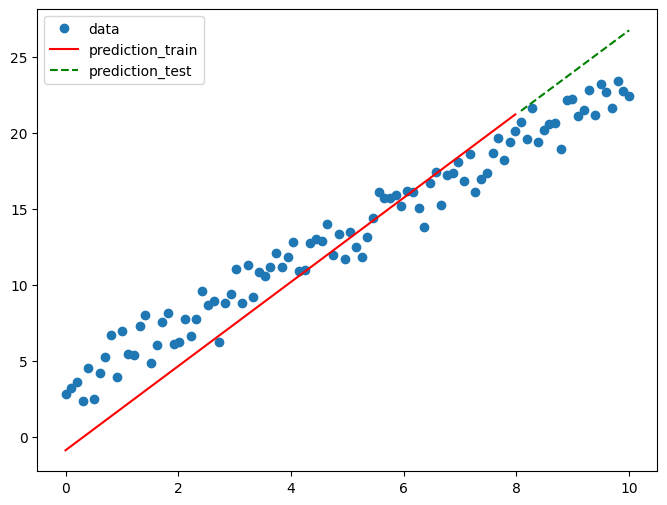

In [22]:
class LinearRegressionModel(nn.Module): 
    def __init__(self):
        super().__init__() 
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True) 

        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=False) 

    def forward(self, x: torch.Tensor) -> torch.Tensor: 
        return self.weights * x + self.bias 
        
if __name__ == "__main__":
    np.random.seed(1337)
    torch.manual_seed(314)
    x, y_true = get_data()
    y = add_noise(y_true)

    x, y_true, y = torch.tensor(x), torch.tensor(y_true), torch.tensor(y)

    train_split = int(0.8 * len(x)) 
    X_train, y_train = x[:train_split], y[:train_split]
    X_test, y_test = x[train_split:], y[train_split:]


    model_0 = LinearRegressionModel()
    # initial_w = model_0.state_dict()['weights'].item()
    last_w = 0
    loss_fn = nn.L1Loss() 

    optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

    epochs = 100

    epoch_count = [i for i in range(1, epochs+1)]
    train_loss_v = []
    test_loss_v = []
    
    for epoch in range(epochs):
        
        model_0.train()
 
        y_pred = model_0(X_train)

        loss = loss_fn(y_pred, y_train)
        train_loss_v.append(loss.item())
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        model_0.eval()

        with torch.inference_mode():
            
            test_pred = model_0(X_test)
            test_loss = loss_fn(test_pred, y_test.type(torch.float))
            test_loss_v.append(test_loss.item())
        # if epoch == 100:
        #     last_w = model_0.state_dict()['weights'].item()
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(epoch_count, train_loss_v, label='Train Loss Value')
    ax.plot(epoch_count, test_loss_v, label='Test Loss Value')
    ax.legend()
    # plt.savefig("train_test_loss.png")
    
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(x, y, "o", label="data")
    ax.plot(X_train, y_pred.cpu().detach().numpy(), "r-", label="prediction_train")
    ax.plot(X_test, test_pred.cpu().detach().numpy(), "g--", label="prediction_test")
    ax.legend(loc="best")
    # tp.savefig("prediction.png")

Коли bias не потребує grad, ситуація стає набагато кращою.

В даному випадку, модель натренувалась і має порівняно непогані результати.

Все ще незадовільні для її використання.

Проте можемо зробити висновок, що weights мають більший вплив на тренування моделі аніж bias.